# Problem set 1

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.options.display.float_format = "{:,.2f}".format

The National Health Interview Survey (NHIS) data is collected on U.S. households since 1957; it covers a broad range of health-related topics from medical conditions, health insurance, and the number of doctor visits to measures of physical activity. Here we focus on indicators relevant for the POM framework; in particular, we will compare the health status of hospitalized and non-hospitalized individuals in 2018. For this purpose, we use answers to the survey question “During the past 12 months, has the respondent been hospitalized overnight¿‘ with potential answers “yes” and “no“ which we code as 1 and 0. Further, we consider answers to the questions “Would you say your health, in general, is excellent, very good, good, fair, poor¿‘ where responses are coded as 1 for poor health up to 5 for excellent health. The survey also collects data on relevant characteristics as sex, age, level of education, hours worked last week, and total earnings.

## Task A.1

Open a Jupyter Notebook and import the data set nhis-initial.xslx — we recommend using the software presented in class (e.g. pandas, matplotlib, etc.). Try to think of ways to answer the following questions: Are there more females or males? Are there more individuals who hold a degree or not?. Now try to relate individual characteristics to the hospitalization status. Are high or low earners/old or young people more often hospitalized?

In [15]:
df = pd.read_excel("data/nhis-initial.xlsx")
df.index.set_names("Individual", inplace=True)
df.head()

,sex,age,education,hours,earnings,hospitalized,health
Individual,,,,,,,
0,Female,34,Never attended,45,Low,0,4
1,Male,49,High school,32,Low,0,3
2,Male,29,Associate degree,25,Middle,0,4
3,Female,47,Bachelor,40,Middle,0,5
4,Male,31,Master,40,Middle,0,5


We want to study average age and working hours.

In [16]:
stat = df["age"].mean()
print(f"Average age in the sample is {stat:.2f}")

Average age in the sample is 43.59


In [17]:
stat = df["hours"].mean()
print(f"Average of working hours per week in the sample is {stat:.0f}")

Average of working hours per week in the sample is 40


/home/peisenha/local/anaconda3/envs/teaching-microeconometrics/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


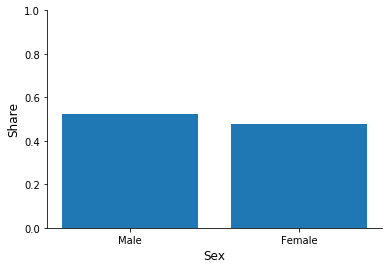

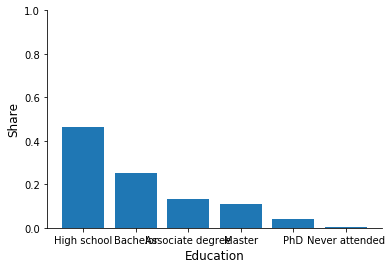

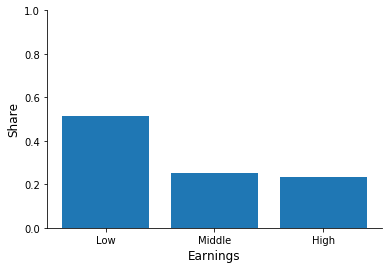

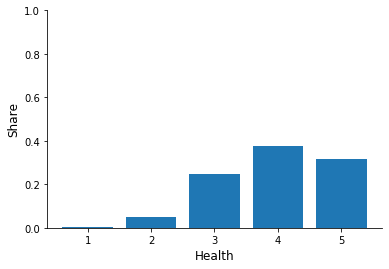

In [18]:
for column in ["sex", "education", "earnings", "health"]:

    fig, ax = plt.subplots()

    info = df[column].value_counts(normalize=True).to_frame()
    x, y = info.index, info.to_numpy().flatten()

    ax.bar(x, y)

    ax.set_xlabel(column.capitalize())

    ax.set_ylim(None, 1)
    ax.set_ylabel("Share")

    fig.show()

Now try to relate individual characteristics to the hospitalization status. 

In [19]:
df.groupby("hospitalized")[["age", "hours"]].mean()

,age,hours
hospitalized,,
0,43.45,40.60
1,45.95,38.78


/home/peisenha/local/anaconda3/envs/teaching-microeconometrics/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


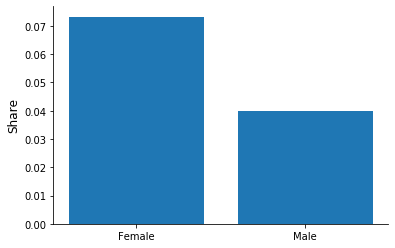

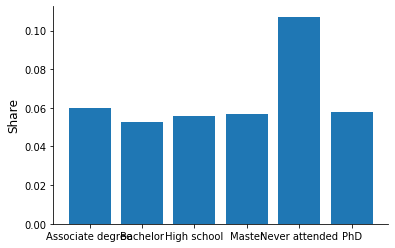

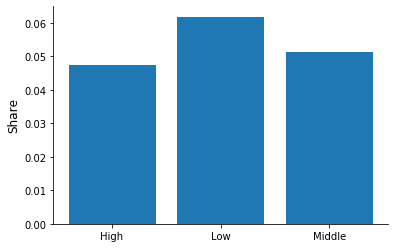

In [20]:
for column in ["sex", "education", "earnings"]:

    fig, ax = plt.subplots()

    rslt = df.groupby(column)["hospitalized"].mean()
    x, y = rslt.index, rslt.to_numpy()

    ax.bar(x, y)

    ax.set_ylabel("Share")

    fig.show()

## Task A.2

Compute the average health status of hospitalized and non-hospitalized individuals. Who is healthier on average? What could be a reason for this bias?

In [38]:
df.groupby("hospitalized")["health"].mean().to_frame()

,health
hospitalized,
0,3.97
1,3.59


## Task A.3

Adjust the data set for the POM framework (as seen in the lecture), with health status as the outcome and hospitalization as the treatment status (Hint: rename and drop columns of the data frame).

In [39]:
df = pd.read_excel("data/nhis-initial.xlsx")

df.rename(columns={"health": "Y", "hospitalized": "D"}, inplace=True)

df["Y_1"] = np.where(df["D"] == 1, df["Y"], np.nan)
df["Y_0"] = np.where(df["D"] == 0, df["Y"], np.nan)

df.head()

,sex,age,education,hours,earnings,D,Y,Y_1,Y_0
0,Female,34,Never attended,45,Low,0,4,nan,4.00
1,Male,49,High school,32,Low,0,3,nan,3.00
2,Male,29,Associate degree,25,Middle,0,4,nan,4.00
3,Female,47,Bachelor,40,Middle,0,5,nan,5.00
4,Male,31,Master,40,Middle,0,5,nan,5.00


## Task A.4

Compute the naive estimate for the average treatment effect (ATE).

In [40]:
stat = df["Y_1"].mean() - df["Y_0"].mean()
print(f"Our naive estimate is {stat:.1f}")

Our naive estimate is -0.4


## Task B.1

As we’ve seen in the lecture, in reality, we can only ever observe one counterfactual; however, when simulating data, we can bypass this problem. The (simulated) data set nhis-simulated.xslx contains counterfactual outcomes, i.e., outcomes under control for individuals assigned to the treatment group and vice versa. Derive and compute the average outcomes in the two observable and two unobservables states; Design them in a similar way as Table 2.3 in Morgan & Winship (2014).

In [26]:
df = pd.read_excel("data/nhis-simulated.xlsx")
df.index.set_names("Individual", inplace=True)
df.head()

,sex,age,education,hours,earnings,hospitalized,health,Y,Y_0,Y_1,D
Individual,,,,,,,,,,,
0,Male,49,High school,32,Low,0,3,3,3.00,4.79,0
1,Male,37,PhD,40,High,0,3,3,3.00,4.79,0
2,Female,36,Bachelor,40,High,0,4,4,4.00,4.96,0
3,Male,29,Associate degree,25,Middle,0,4,4,4.00,4.71,0
4,Female,34,High school,40,Middle,0,5,5,5.00,4.78,0


In [27]:
rslt = df.groupby("D")[["Y_1", "Y_0"]].mean()

rslt.columns = ["E[Y_1|D]", "E[Y_0|D]"]
rslt.index = ["Untreated", "Treated"]

rslt

,E[Y_1|D],E[Y_0|D]
Untreated,4.90,3.97
Treated,3.59,3.90


## Task B.2 

From here on we assume that 5% of the population take the treatment. Derive and explain formula 2.12 from Morgan & Winship (2014) for the naive estimator as a decomposition of true ATE, baseline bias, and differential treatment
effect bias (do this with pen and paper).

This derivation is straightforward.

## Task B.3

Compute the naive estimate and true value of the ATE for the simulated data. Is the naive estimator upwardly or downwardly biased? Calculate the baseline bias and differential treatment effect bias. How could we interpret these biases in our framework of health status of hospitalized and non-hospitalized respondents?

In [36]:
pi = 0.05

# naive estimate
naive = rslt.loc["Treated", "E[Y_1|D]"] - rslt.loc["Untreated", "E[Y_0|D]"]

# baseline bias
base = rslt.loc["Treated", "E[Y_0|D]"] - rslt.loc["Untreated", "E[Y_0|D]"]

# differential effect
diff = 0
diff += rslt.loc["Treated", "E[Y_1|D]"] - rslt.loc["Treated", "E[Y_0|D]"]
diff -= rslt.loc["Untreated", "E[Y_1|D]"] - rslt.loc["Untreated", "E[Y_0|D]"]
diff *= 1 - pi

# true average treatment effect
true = 0
true += pi * (rslt.loc["Treated", "E[Y_1|D]"] - rslt.loc["Treated", "E[Y_0|D]"])
true += (1 - pi) * (
    rslt.loc["Untreated", "E[Y_1|D]"] - rslt.loc["Untreated", "E[Y_0|D]"]
)
print(f"naive: {naive:.2f}, base: {base:.2f}, diff: {diff:.2f}, true: {true:.2f}")

# We can also test the relationships just to be sure.
np.testing.assert_almost_equal(true, naive - (base + diff), decimal=10)

naive: -0.38, base: -0.07, diff: -1.18, true: 0.87


## Task B.4 

Which assumptions must hold (on the data) such that the naive estimator is an unbiased and consistent estimator for the ATE?

We need the *stable unit treatment value assumption* and independence between potential outcomes and the treatment.

## References

* Winship, C., and Morgan, S. L. (2014). [*Counterfactuals and causal inference: Methods and principles for social research*](https://www.cambridge.org/de/academic/subjects/sociology/sociology-general-interest/counterfactuals-and-causal-inference-methods-and-principles-social-research-2nd-edition?format=PB). Cambridge, England: Cambridge University Press.

* Angrist, J. D., and Pischke, J. (2009). [*Mostly harmless econometrics: An empiricists companion*](https://press.princeton.edu/titles/8769.html). Princeton, NJ: Princeton University Press.

* [National Health Interview Survey.](https://www.cdc.gov/nchs/nhis/index.htm) (2018). National Center for Health Statistics.